In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('logged_data.csv')

In [4]:
df.head

<bound method NDFrame.head of                   Timestamp  Frequency  Signal Strength Modulation  Bandwidth  \
0       2023-05-05 00:00:00  120000000              -44        QAM      50000   
1       2023-05-05 00:00:20  160000000              -97         FM    1000000   
2       2023-05-05 00:00:40   90000000              -87       BPSK     500000   
3       2023-05-05 00:01:00  160000000              -29         FM     100000   
4       2023-05-05 00:01:20   70000000              -26       8PSK      10000   
...                     ...        ...              ...        ...        ...   
164155  2023-06-11 23:58:20  160000000              -63       BPSK     200000   
164156  2023-06-11 23:58:40  120000000              -15        QAM      10000   
164157  2023-06-11 23:59:00  160000000              -97         FM      10000   
164158  2023-06-11 23:59:20  120000000              -29         AM     500000   
164159  2023-06-11 23:59:40   70000000              -68        QAM     100000  

In [5]:
df.head()

,Timestamp,Frequency,Signal Strength,Modulation,Bandwidth,Location,Device Type,Antenna Type,Temperature,Humidity,...,Memory Usage,WiFi Strength,Disk Usage,System Load,Latitude,Longitude,Altitude(m),Air Pressure,Device Status,I/Q Data
0,2023-05-05 00:00:00,120000000,-44,QAM,50000,"Patna, Bihar",HackRF,Yagi,24,47,...,28.3,-77,18.5,4.300781,25.612677,85.158875,59.46,NaN,Streaming I/Q data,"[(-0.7204492334669581-0.13150053996590505j), (..."
1,2023-05-05 00:00:20,160000000,-97,FM,1000000,"Patna, Bihar",HackRF,Yagi,27,39,...,28.3,-57,18.5,4.300781,25.612677,85.158875,59.46,NaN,Streaming I/Q data,"[(-0.9514742558373084-0.2713158600194827j), (-..."
2,2023-05-05 00:00:40,90000000,-87,BPSK,500000,"Patna, Bihar",Halow-U,Yagi,40,58,...,28.3,-20,18.5,4.300781,25.612677,85.158875,59.46,NaN,Transmitting beacon signal,"[(0.2227144792597957+0.958588241755097j), (0.2..."
3,2023-05-05 00:01:00,160000000,-29,FM,100000,"Patna, Bihar",Halow-U,Dipole,28,50,...,28.3,-38,18.5,4.300781,25.612677,85.158875,59.46,NaN,Transmitting beacon signal,"[(-0.3238055039162817+0.855187296295747j), (-0..."
4,2023-05-05 00:01:20,70000000,-26,8PSK,10000,"Patna, Bihar",HackRF,Omnidirectional,22,78,...,28.3,-43,18.5,4.300781,25.612677,85.158875,59.46,NaN,Streaming I/Q data,"[(-0.30500282741187124-0.26473341302686326j), ..."


In [6]:
df.columns

Index(['Timestamp', 'Frequency', 'Signal Strength', 'Modulation', 'Bandwidth',
       'Location', 'Device Type', 'Antenna Type', 'Temperature', 'Humidity',
       'Wind Speed', 'Precipitation', 'Weather Condition', 'Interference Type',
       'Battery Level', 'Power Source', 'CPU Usage', 'Memory Usage',
       'WiFi Strength', 'Disk Usage', 'System Load', 'Latitude', 'Longitude',
       'Altitude(m)', 'Air Pressure', 'Device Status', 'I/Q Data'],
      dtype='object')

# Training model through GradientBoostingRegressor (sklearn)

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
features = [
    'Frequency', 'Temperature', 'Humidity',
    'Wind Speed', 'Precipitation', 'Altitude(m)'
]
target = 'Signal Strength'

# Extract X and y
X = df[features]
y = df[target]

# Handle missing values (if any)
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## GradientBoostingRegressor (sklearn)

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

# Predict
gbr_preds = gbr_model.predict(X_test)

# Evaluate
print("Gradient Boosting Regressor Results")
print("MSE:", mean_squared_error(y_test, gbr_preds))
print("R²:", r2_score(y_test, gbr_preds))


ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [10]:
features = [
    'Frequency', 'Temperature', 'Humidity',
    'Wind Speed', 'Precipitation', 'Altitude(m)', 'Air Pressure'
]

target = 'Signal Strength'

X = df[features]
y = df[target]


In [11]:
print(X.isnull().sum())


Frequency             0
Temperature           0
Humidity              0
Wind Speed            0
Precipitation         0
Altitude(m)           0
Air Pressure     164160
dtype: int64


In [12]:
X = X.fillna(X.mean())  # or use more sophisticated imputation


In [13]:
print(X.isnull().sum())


Frequency             0
Temperature           0
Humidity              0
Wind Speed            0
Precipitation         0
Altitude(m)           0
Air Pressure     164160
dtype: int64


## XGBRegressor model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

# Predict and evaluate
gbr_preds = gbr_model.predict(X_test)

print("Gradient Boosting Regressor Results")
print("MSE:", mean_squared_error(y_test, gbr_preds))
print("R²:", r2_score(y_test, gbr_preds))


Gradient Boosting Regressor Results
MSE: 849.3275070944774
R²: -0.0004656281833919085


In [20]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print("XGBoost Results")
print("MSE:", mean_squared_error(y_test, xgb_preds))
print("R²:", r2_score(y_test, xgb_preds))


XGBoost Results
MSE: 851.6203215799205
R²: -0.003166449792636694


In [21]:
df.head()

,Timestamp,Frequency,Signal Strength,Modulation,Bandwidth,Location,Device Type,Antenna Type,Temperature,Humidity,...,Memory Usage,WiFi Strength,Disk Usage,System Load,Latitude,Longitude,Altitude(m),Air Pressure,Device Status,I/Q Data
0,2023-05-05 00:00:00,120000000,-44,QAM,50000,"Patna, Bihar",HackRF,Yagi,24,47,...,28.3,-77,18.5,4.300781,25.612677,85.158875,59.46,NaN,Streaming I/Q data,"[(-0.7204492334669581-0.13150053996590505j), (..."
1,2023-05-05 00:00:20,160000000,-97,FM,1000000,"Patna, Bihar",HackRF,Yagi,27,39,...,28.3,-57,18.5,4.300781,25.612677,85.158875,59.46,NaN,Streaming I/Q data,"[(-0.9514742558373084-0.2713158600194827j), (-..."
2,2023-05-05 00:00:40,90000000,-87,BPSK,500000,"Patna, Bihar",Halow-U,Yagi,40,58,...,28.3,-20,18.5,4.300781,25.612677,85.158875,59.46,NaN,Transmitting beacon signal,"[(0.2227144792597957+0.958588241755097j), (0.2..."
3,2023-05-05 00:01:00,160000000,-29,FM,100000,"Patna, Bihar",Halow-U,Dipole,28,50,...,28.3,-38,18.5,4.300781,25.612677,85.158875,59.46,NaN,Transmitting beacon signal,"[(-0.3238055039162817+0.855187296295747j), (-0..."
4,2023-05-05 00:01:20,70000000,-26,8PSK,10000,"Patna, Bihar",HackRF,Omnidirectional,22,78,...,28.3,-43,18.5,4.300781,25.612677,85.158875,59.46,NaN,Streaming I/Q data,"[(-0.30500282741187124-0.26473341302686326j), ..."


In [22]:
correlation = df[features + ['Signal Strength']].corr()
print(correlation['Signal Strength'].sort_values())


Temperature       -0.001693
Wind Speed        -0.000978
Humidity          -0.000831
Frequency          0.000067
Precipitation      0.004000
Signal Strength    1.000000
Altitude(m)             NaN
Name: Signal Strength, dtype: float64


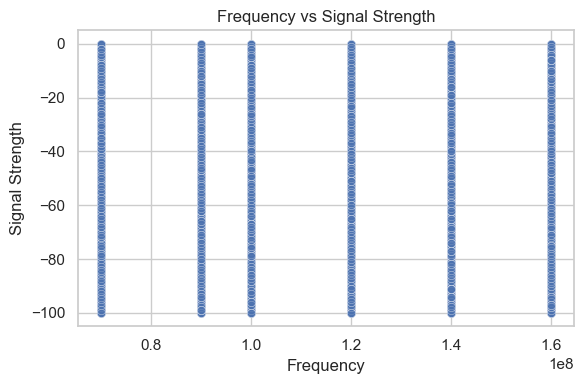

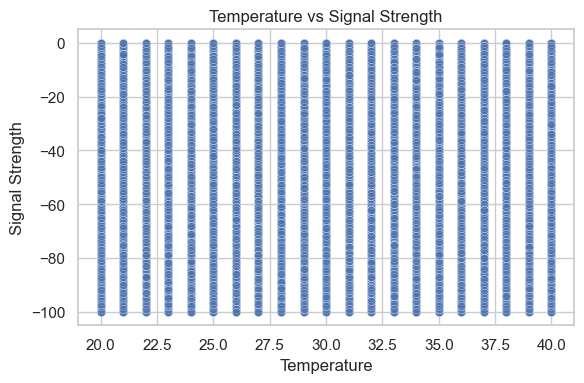

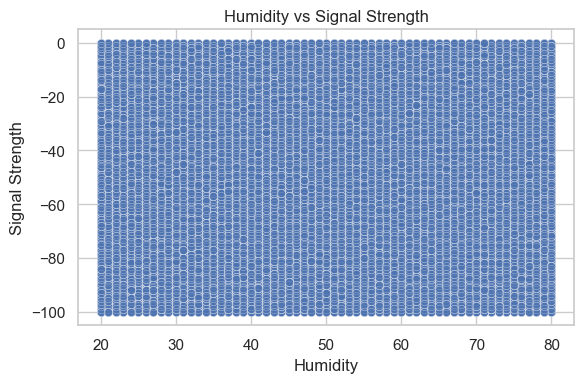

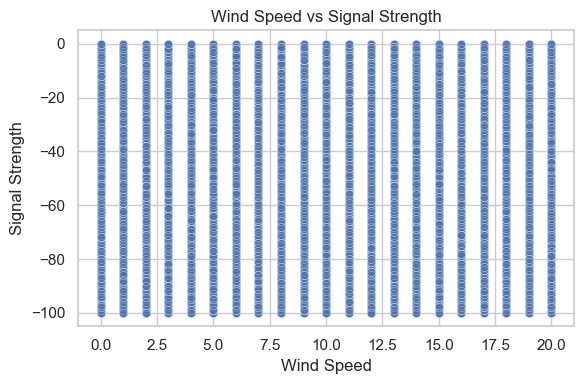

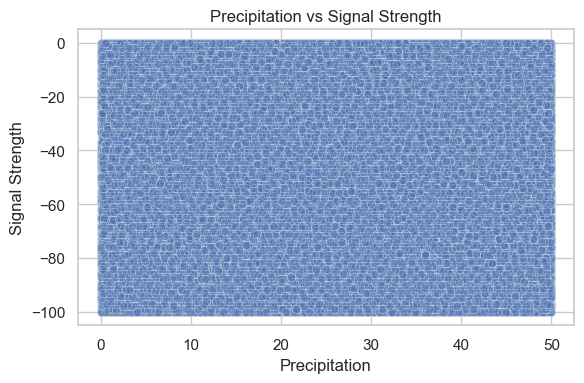

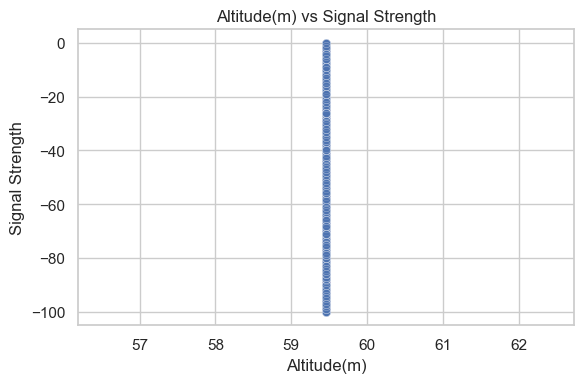

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure clean data (drop rows with missing values in any relevant column)
df_plot = df[features + [target]].dropna()

# Set plot style
sns.set(style="whitegrid")

# Plot each feature vs Signal Strength
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_plot, x=feature, y=target, alpha=0.3)
    plt.title(f"{feature} vs Signal Strength")
    plt.xlabel(feature)
    plt.ylabel("Signal Strength")
    plt.tight_layout()
    plt.show()


# Bar plot of signal affect parameters

C:\Users\SAYANTAN MONDAL\AppData\Local\Temp\ipykernel_8156\3246650616.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


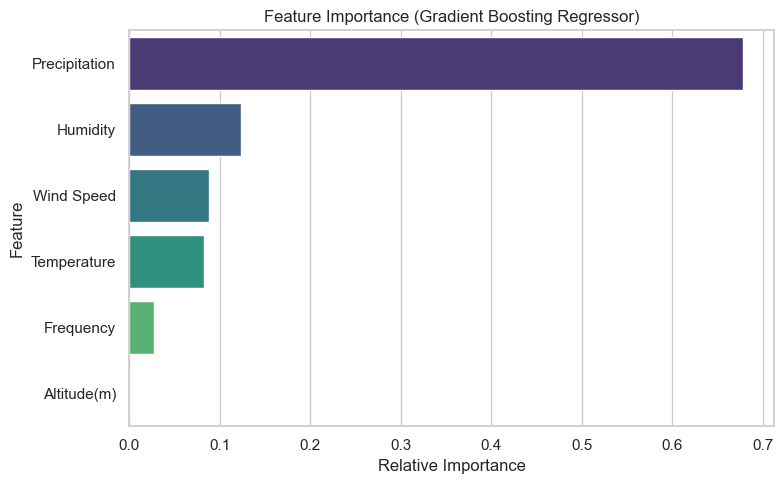

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming model is already trained: gbr_model or xgb_model
# Use the model that performed best; here we'll assume `gbr_model`

# Get feature importances
importances = gbr_model.feature_importances_
feature_names = ['Frequency', 'Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Altitude(m)']

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Gradient Boosting Regressor)')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [25]:
import joblib

# Assume your trained model is `gbr_model`
joblib.dump(gbr_model, 'signal_strength_model.pkl')


['signal_strength_model.pkl']